In [2]:
import pandas as pd

In [54]:
df1 = pd.read_csv('test_results/x128-resnet-rdn-rgb/after_result.csv')
df2 = pd.read_csv('test_results/x128-resnet-rdn-rgb/before_result.csv')

In [47]:
att_results = df

In [48]:
def ana_results(results):
    mss = ''
    for fake_class in ['progan', 'mmdgan', 'stgan', 'stargan']:
        correct = 0
        total = 0
        for i in range(len(results)):
            if fake_class in att_results['name'][i]:
                # print(att_results['gt'][i])
                total += 1 
                if results['gt'][i] == results['pred'][i]:
                    correct += 1
        mss += f'{fake_class} images: eval acc: {(correct / total):.5f};\n'
    return mss
    # return valid_mss
    # print_and_write_log(valid_mss,
    #                     os.path.join(result_outputs_dir, 'det_logs.txt'))

In [55]:
print(ana_results(df1))
print(ana_results(df2))

progan images: eval acc: 0.12686;
mmdgan images: eval acc: 0.01949;
stgan images: eval acc: 0.99551;
stargan images: eval acc: 0.99950;

progan images: eval acc: 0.90005;
mmdgan images: eval acc: 0.03385;
stgan images: eval acc: 0.99451;
stargan images: eval acc: 0.99950;



In [3]:
df1 = pd.read_csv('dataset/celeba-128/celeba_128.csv')

In [15]:
df1['mul_cls']

0           real
1          stgan
2           real
3           real
4           real
           ...  
175995      real
175996      real
175997      real
175998    progan
175999      real
Name: mul_cls, Length: 176000, dtype: object

In [20]:
a = []
if not a:
    print(a)

[]


In [30]:
df1.loc[(df1['mul_cls'].isin(['progan', 'mmdgan'])) & (df1['allocation'] == 'train')].head(20)

,filename,two_cls,mul_cls,allocation
6,./dataset/celeba-128/mmdgan/MMD_00026555.png,f,mmdgan,train
10,./dataset/celeba-128/progan/5897.png,f,progan,train
11,./dataset/celeba-128/progan/4961.png,f,progan,train
22,./dataset/celeba-128/progan/15276.png,f,progan,train
29,./dataset/celeba-128/progan/20785.png,f,progan,train
31,./dataset/celeba-128/progan/19722.png,f,progan,train
33,./dataset/celeba-128/mmdgan/MMD_00004526.png,f,mmdgan,train
39,./dataset/celeba-128/progan/13448.png,f,progan,train
45,./dataset/celeba-128/progan/4459.png,f,progan,train
46,./dataset/celeba-128/mmdgan/MMD_00039572.png,f,mmdgan,train


In [36]:
str().join(['a','b'])


'ab'

In [3]:
from utils import psd_loss
import os
import glob
import random
import torch
import PIL.Image as I
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def avg_profile_and_sd(self, data, batch_size=1024):
    if len(data) < batch_size:
        profile = self.spectral_vector(data)
        return profile.mean(0), profile.std(0)
    else:
        i = 0
        v_total = []
        while i < len(data):
            i_next = i + batch_size
            v_total.append(self.spectral_vector(data[i:i_next]))
            i = i_next

        v = torch.cat(v_total)
        return v.mean(0), v.std(0)

In [29]:
def visualize_results(bp, ap, num):
    # fake_types = ["deepfake"]
    types = ['real', 'progan', 'stgan', 'mmdgan', 'stargan']
    PSD = psd_loss.PSDLoss(128,128)

    b_cans = glob.glob(os.path.join(bp + "*.png"))
    a_cans = glob.glob(os.path.join(ap + "*.png"))
    random.shuffle(b_cans)
    random.shuffle(a_cans)      
    plt.figure(figsize=(15,10))
    
    before_real = 0
    for t in types:
        bt_list = []
        at_list = []
        for i, j in zip(b_cans, a_cans):
            if t in i:
                bt_list.append(i)
            if t in j:
                at_list.append(j)
        bt_list = bt_list[:num]
        at_list = at_list[:num]
        # print(t, len(bt_list), len(at_list), bt_list[:10], at_list[:10])  
        b_ims = torch.from_numpy(np.array([np.array(I.open(i)) for i in bt_list])).to('cuda:0')                            
        a_ims = torch.from_numpy(np.array([np.array(I.open(i)) for i in at_list])).to('cuda:0')
        
        b_ims = b_ims.permute(0, 3, 1, 2).to(torch.float)
        a_ims = a_ims.permute(0, 3, 1, 2).to(torch.float)
        
        b_spectrum = PSD.spectral_vector(b_ims).cpu()
        a_spectrum = PSD.spectral_vector(a_ims).cpu()
        # plt.plot(b_spectrum.mean(0), '-.', label=f'{t}-before')
        plt.plot(a_spectrum.mean(0), '-', label=f'{t}-after')
        if t == 'real':
            before_real = b_spectrum
    plt.plot(before_real.mean(0), '-.', label=f'{t}-before')
    plt.legend()


In [5]:
visualize_results('./test_results/rdn/before/', './test_results/rdn/after/', 1000)

NameError: name 'visualize_results' is not defined

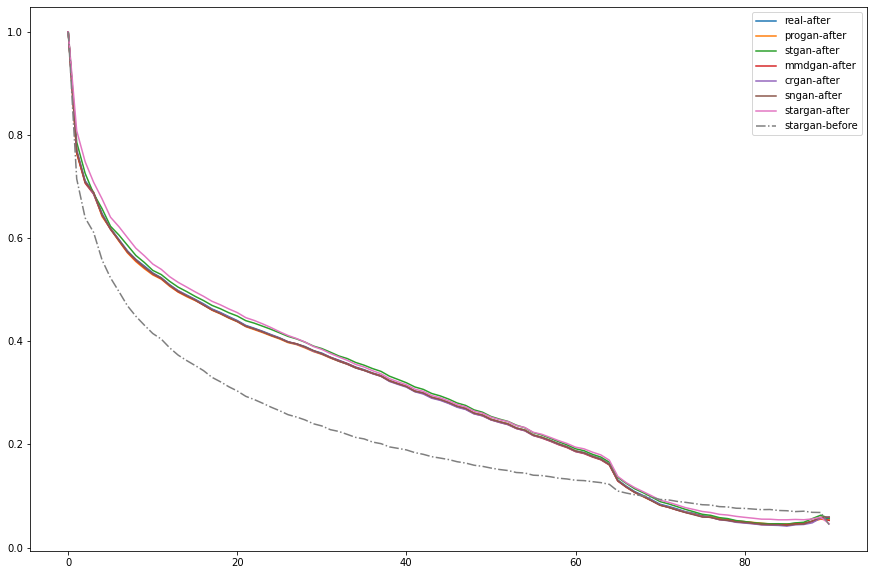

In [25]:
visualize_results('./test_results/vae/before/', './test_results/vae/after/', 1000)

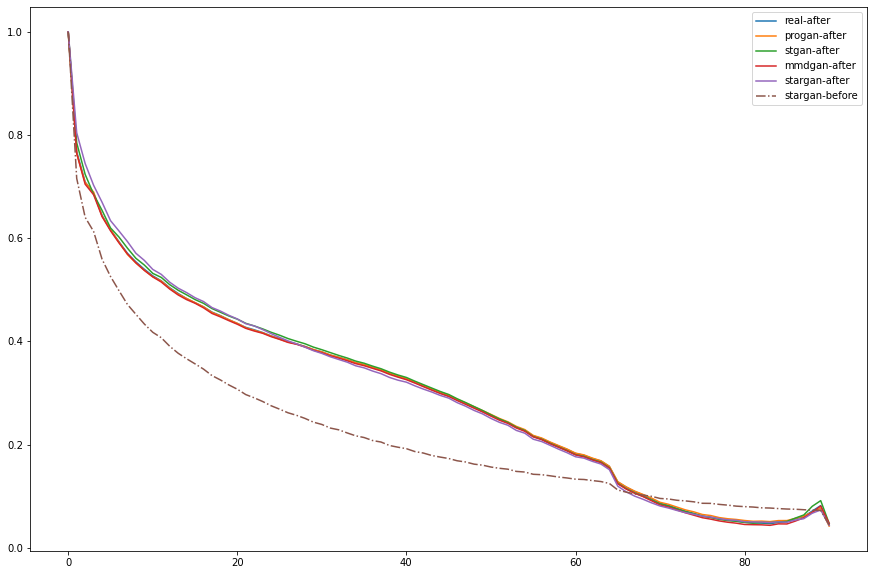

In [30]:
visualize_results('./test_results/unet/before/', './test_results/unet/after/', 1000)

# check average spectra

In [9]:
from PIL import Image
import numpy as np
import glob
def average_spectra(im_list, number):
    ims = np.array([np.array(Image.open(i).convert('L')) for i in im_list[0:number]])
    ffts = np.fft.fftshift(np.fft.fft2(ims))
    fft_mean = np.mean(abs(ffts), axis=0)
    fft_mean = np.log(fft_mean + 1e-10)
    return fft_mean

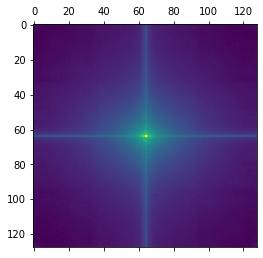

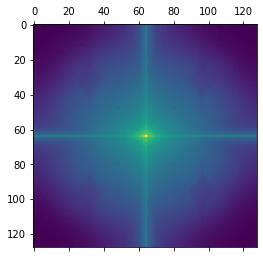

In [26]:
im_list = glob.glob('./test_results/vae/before/celeba-128-mmdgan-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_results/vae/after/celeba-128-mmdgan-*')
plt.matshow(average_spectra(im_list, 500))

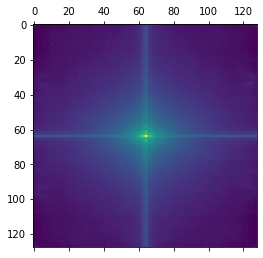

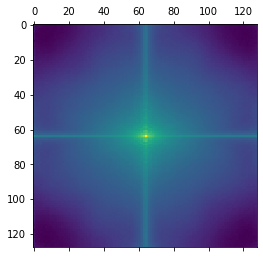

In [65]:
im_list = glob.glob('./test_results/rdn/before/celeba-128-progan-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_results/rdn/after/celeba-128-progan-*')
plt.matshow(average_spectra(im_list, 500))

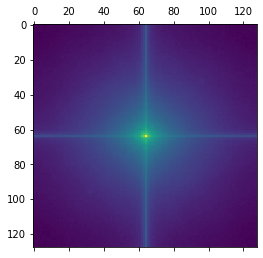

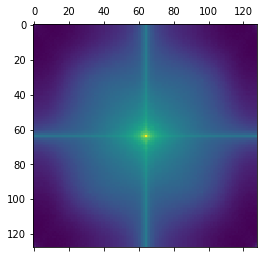

In [28]:
im_list = glob.glob('./test_results/unet/before/celeba-128-stgan-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_results/unet/after/celeba-128-stgan-*')
plt.matshow(average_spectra(im_list, 500))

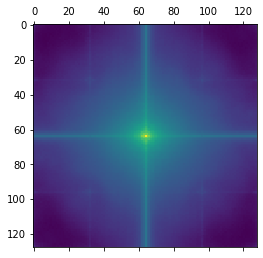

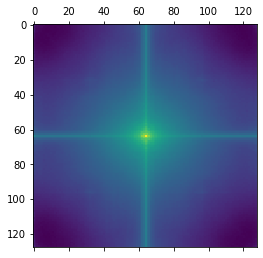

In [67]:
im_list = glob.glob('./test_results/rdn/before/celeba-128-stargan-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_results/rdn/after/celeba-128-stargan-*')
plt.matshow(average_spectra(im_list, 500))

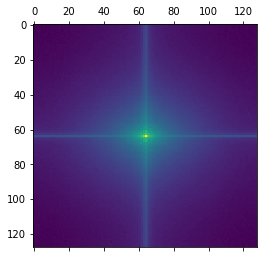

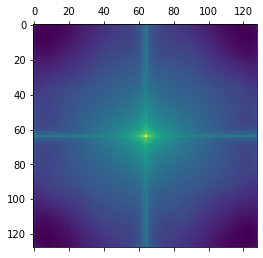

In [68]:
im_list = glob.glob('./test_results/rdn/before/celeba-128-real-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_results/rdn/after/celeba-128-real-*')
plt.matshow(average_spectra(im_list, 500))

In [13]:
c=0
for i in glob.glob('./dataset/celeba-128/crgan/*.png'):
    try: 
        Image.open(i)
        c+=1
        # print(c)
    except:
        print(i)
        pass

In [12]:
c=0
for i in glob.glob('./dataset/celeba-128/sngan/*.png'):
    try: 
        Image.open(i)
        c+=1
        # print(c)
    except:
        print(i)
        pass

In [1]:
from dataset import AttackDataset2

In [2]:
dd = AttackDataset2('./dataset/attack_stage1_samples/rdn-ssim-fft/rdn/', length=100)

In [3]:
dd.__len__()

80

In [5]:
a,b,c=dd.__getitem__(0)

In [8]:
b.shape

torch.Size([3, 128, 128])

In [1]:
from attacker_nets import get_attacker
net = get_attacker('stage2_G')

In [10]:
import torch

In [4]:
t = torch.rand((10,3,128,128))

In [5]:
tt = net(t)

/home/chi-liu/miniconda3/envs/SDM/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


In [6]:
tt.shape

torch.Size([10, 3, 128, 128])

In [12]:
indices = torch.randperm(len([dd]))[:3000]


In [16]:
import random

In [17]:
indices = random.sample(range(len(dd)), int(0.8 * len(dd)))

In [24]:
[i for i in range(len(dd)) if i not in indices]

[5, 11, 13, 20, 22, 26, 49, 54, 55, 56, 58, 63, 68, 72, 73, 78]

In [39]:
import glob
a = [i for i in glob.glob(os.path.join(os.path.join('./dataset/attack_stage1_samples/rdn-ssim-fft/rdn/', 'before'), '*.png')) if 'real' not in i]

In [40]:
a

['./dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-progan-1209.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-mmdgan-MMD_00063495.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-crgan-CRAMER_00081240.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-stgan-002389.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-stargan-10863-sewed.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-stargan-2159-sewed.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-crgan-CRAMER_00006326.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-progan-1860.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-mmdgan-MMD_00056004.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-stargan-9146-sewed.png',
 './dataset/attack_stage1_samples/rdn-ssim-fft/rdn/before/celeba-128-mm

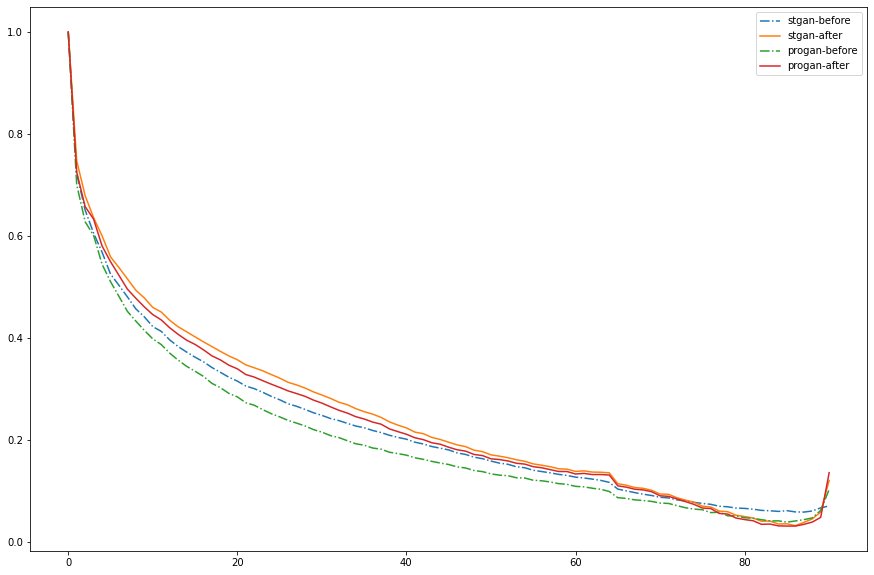

In [40]:
from utils import utils

utils.visualize_spectral_distribution('./test_stage2_results/stage2_G/before/',
                                      './test_stage2_results/stage2_G/after/', 
                                      num=500,
                                      types=['stgan', 'progan'])

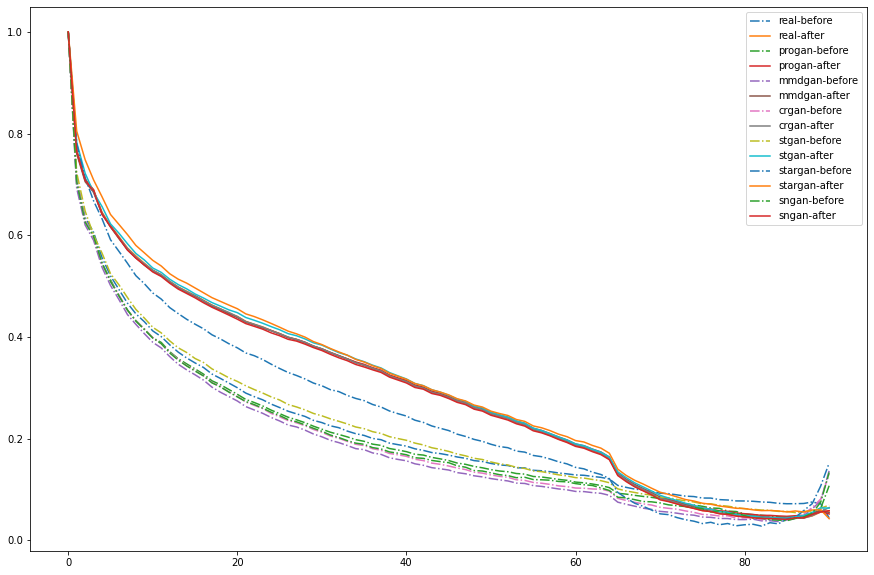

In [40]:
utils.visualize_spectral_distribution('./test_results/vae/before/', './test_results/vae/after/', 500, types=['real', 'progan', 'mmdgan','crgan', 'stgan','stargan','sngan'])

In [16]:
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
import scipy.io as sio
import numpy as np
import os
import glob
from PIL import Image as I
from utils import utils


In [ ]:

data_dir = './test_stage2_results/stage2_G/before/'
to_dir = './test_stage2_results/test2-resize/'
sigma= [0.0, 0.01, 0.02, 0.03, 0.04]

for name in ['real', 'progan', 'mmdgan','crgan', 'stgan','stargan','sngan']:
    count = 0 
    for i in glob.glob(os.path.join(data_dir, '*.png')):
        if name in i:
            im = np.asarray(I.open(i))
            im_bayes = denoise_wavelet(im, multichannel=True, convert2ycbcr=True,
                                    method='BayesShrink', mode='soft',sigma=1)*255
            # print(im_bayes)
            im_bayes = im_bayes.astype(np.uint8)
            # print(np.max(im_bayes))
            # print(im_bayes.astype(np.int))
            im_bayes = I.fromarray(im_bayes)
            im = I.fromarray(im)
            im = im.resize((64,64)).resize((128,128))
            im_bayes = im_bayes.resize((64,64)).resize((128,128))
            im_bayes.save(os.path.join(to_dir, 'after/', i.split('/')[-1]))
            im.save(os.path.join(to_dir, 'before/', i.split('/')[-1]))
            count += 1
            if count == 499:
                break
    # plt.imsave(os.path.join(to_dir, i.split('/')[-1]), im_bayes)

In [31]:
a , b = im_bayes.size[0:2]

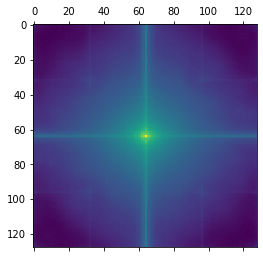

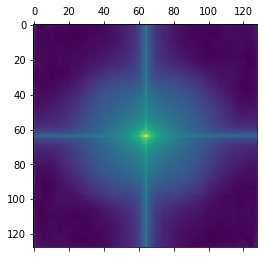

In [47]:
im_list = glob.glob('./test_results/10000_wrf/rdn/before/celeba-128-stargan-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_results/10000_wrf/rdn/after/celeba-128-stargan-*')
plt.matshow(average_spectra(im_list, 500))

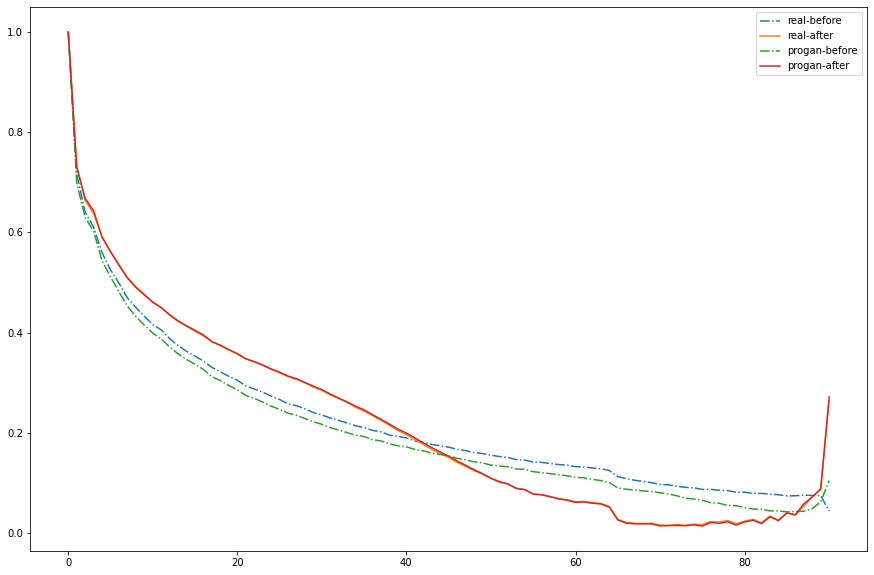

In [25]:
utils.visualize_spectral_distribution('./test_results/10000_wrf/rdn/before/',
                                      './test_results/10000_wrf/rdn/after/', 
                                      num=500,
                                      types=['real', 'progan',],
                                      shape=(128,128))

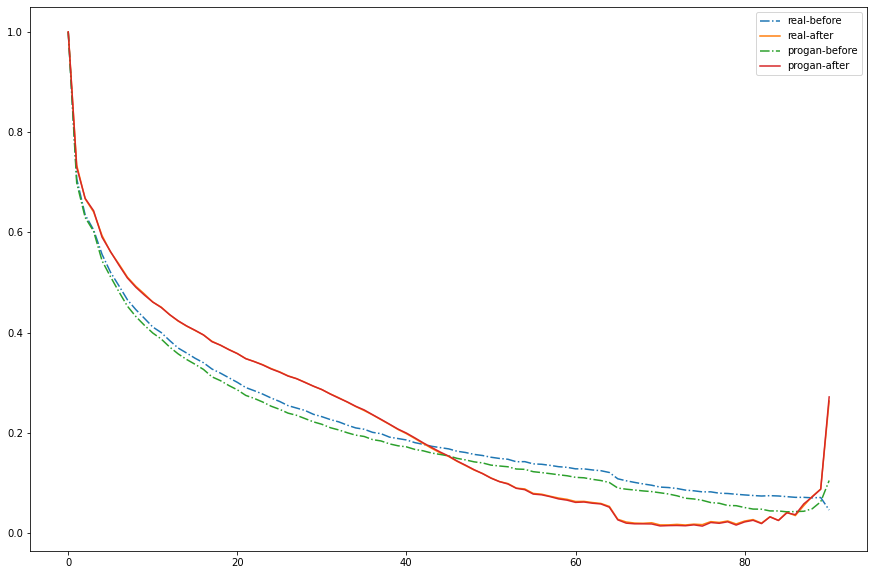

In [50]:
utils.visualize_spectral_distribution('./test_results/10000_wrf/rdn/before/', './test_results/10000_wrf/rdn/after/', 500,  types=['real', 'progan',],)

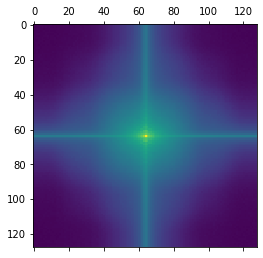

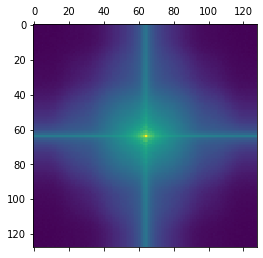

In [19]:
im_list = glob.glob('./test_stage2_results/test2-resize/stage2_G/before/celeba-128-real-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_stage2_results/test2-resize/stage2_G/after/celeba-128-real-*')
plt.matshow(average_spectra(im_list, 500))

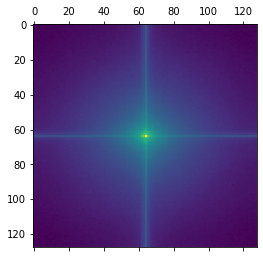

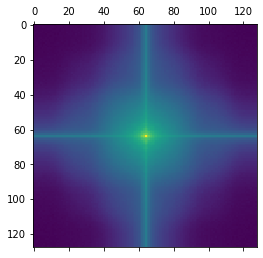

In [12]:
im_list = glob.glob('./test_stage2_results/test2-resize/stage2_G/before/celeba-128-stgan-*')
plt.matshow(average_spectra(im_list, 500))
im_list = glob.glob('./test_stage2_results/test2-resize/stage2_G/after/celeba-128-stgan-*')
plt.matshow(average_spectra(im_list, 500))

In [1]:
from attacker_nets import get_attacker

In [2]:
model = get_attacker('edsr')

In [3]:
import torch
ims = torch.Tensor(10,3,64,64)

In [4]:
out = model(ims)

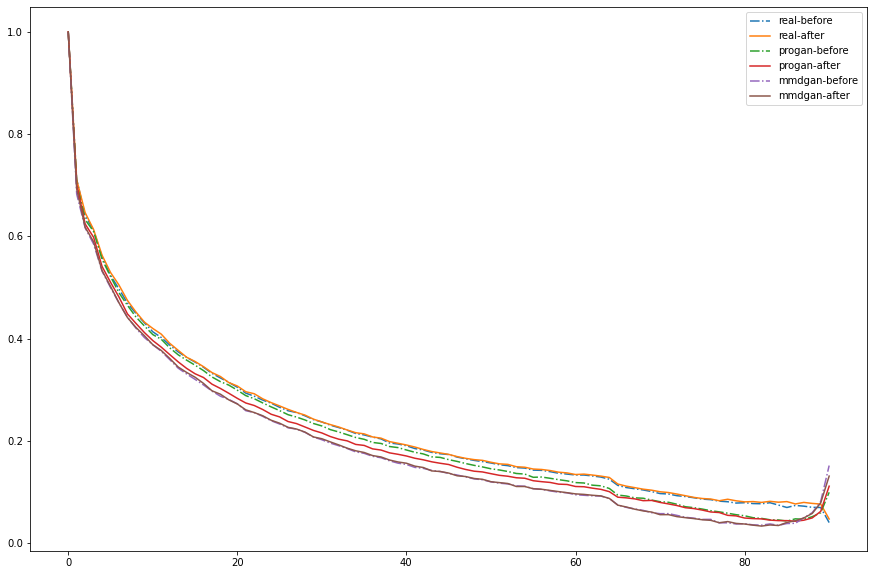

In [43]:
utils.visualize_spectral_distribution('test_results/128to128/rdn/before/', 
                                      'test_results/128to128/rdn/after/', 100, types=['real', 'progan', 'mmdgan'])